In [1]:
PATH = "/Users/andryha/Desktop/skpod/results/MPI_jobs_out"

In [2]:
import os
import pandas as pd
import numpy as np

In [25]:
df = pd.DataFrame(columns=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], index=[i * 100000000 for i in range(1, 11)])

In [26]:
for items in os.listdir(PATH):
    if not '.out' in items:
        continue
    with open(os.path.join(PATH, items),"r") as f:
        data = f.read()
        num_of_intervals = int(data[len('#N of intervals:'): data.find('\n') + 1])
        num_of_cores = int(data[data.find('\n') + len('#N of cores: ') + 1: data.find('TIME:')])
        time = float(data[data.find('TIME:') + len('TIME: '):])
        #if not df[num_of_cores][num_of_intervals] is np.nan:
        df[num_of_cores][num_of_intervals] = time

In [27]:
df

,1,2,4,8,16,32,64,128,256,512,1024
100000000,69.8465,30.4231,14.4188,7.02786,3.51408,1.75718,0.878589,0.4394,0.21972,0.10995,0.055062
200000000,139.69,60.845,28.8362,14.0549,7.0279,3.51426,1.7571,0.878627,0.439319,0.21975,0.109964
300000000,209.541,91.2699,43.2533,21.0817,10.5412,5.27098,2.63544,1.31787,0.658992,0.329522,0.164842
400000000,279.022,121.691,57.6701,28.1084,14.0548,7.02783,3.51385,1.75706,0.878538,0.439386,0.21979
500000000,349.227,152.111,72.0883,35.1348,17.5681,8.78468,4.39251,2.19641,1.09821,0.549144,0.274653
600000000,419.041,182.536,86.5045,42.1629,21.0821,10.5417,5.27096,2.63552,1.31788,0.65896,0.329562
700000000,488.915,212.953,100.921,49.1884,24.5954,12.2985,6.14919,3.07477,1.5374,0.768846,0.384426
800000000,558.028,243.377,115.338,56.2159,28.1092,14.0553,7.0278,3.51406,1.75694,0.878566,0.439361
900000000,628.609,273.801,129.756,63.2437,31.6235,15.8126,7.9063,3.9533,1.97681,0.98853,0.494309
1000000000,698.443,304.219,144.177,70.2702,35.136,17.5692,8.7849,4.39257,2.19628,1.09818,0.549189


In [28]:
df_2 = pd.DataFrame(columns=[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], index=[1, 2])

In [30]:
df_2.loc[1] = df.loc[100000000]

In [32]:
df_2.loc[2] = [40.7387, 21.3874, 10.8865, 6.81372, 4.89778, 4.17155, 2.31908, 2.40179, 2.40179, 2.40179, 2.40179]

In [36]:
df_2.T

,1,2
1,69.8465,40.7387
2,30.4231,21.3874
4,14.4188,10.8865
8,7.02786,6.81372
16,3.51408,4.89778
32,1.75718,4.17155
64,0.878589,2.31908
128,0.4394,2.40179
256,0.21972,2.40179
512,0.10995,2.40179


<IPython.core.display.Javascript object>


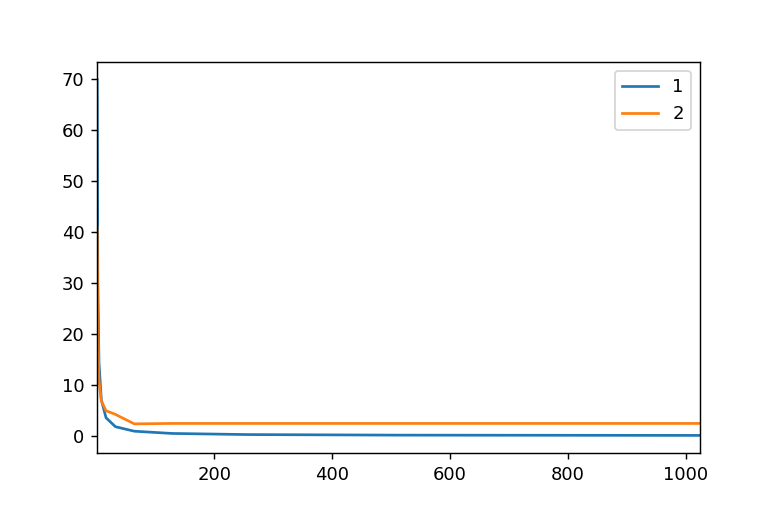

In [37]:
df_2.T.plot()

<IPython.core.display.Javascript object>


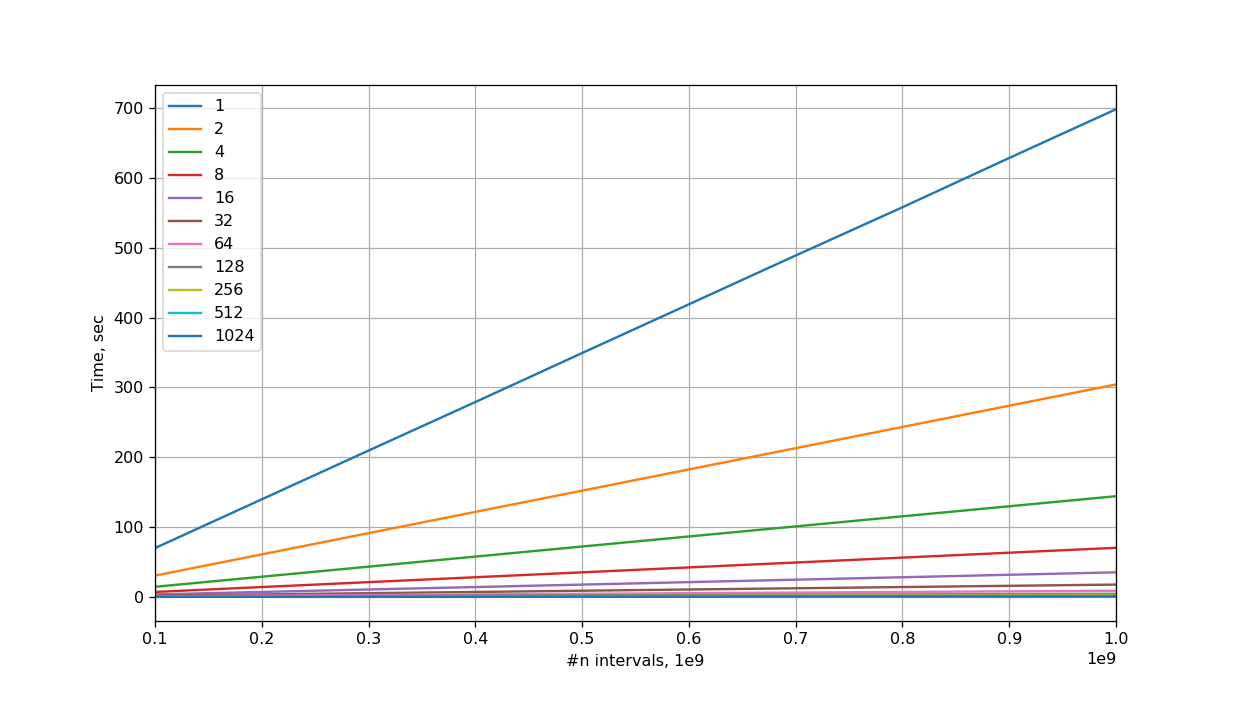

Text(0, 0.5, 'Time, sec')

In [8]:
%matplotlib notebook
import matplotlib.cm as cm
# cm = plt.get_cmap('gist_rainbow')
# colors = [cm(1.*i/11) for i in range(11)]
ax = df.plot(grid=True)
ax.set_xlabel("#n intervals, 1e9")
ax.set_ylabel("Time, sec")

<IPython.core.display.Javascript object>


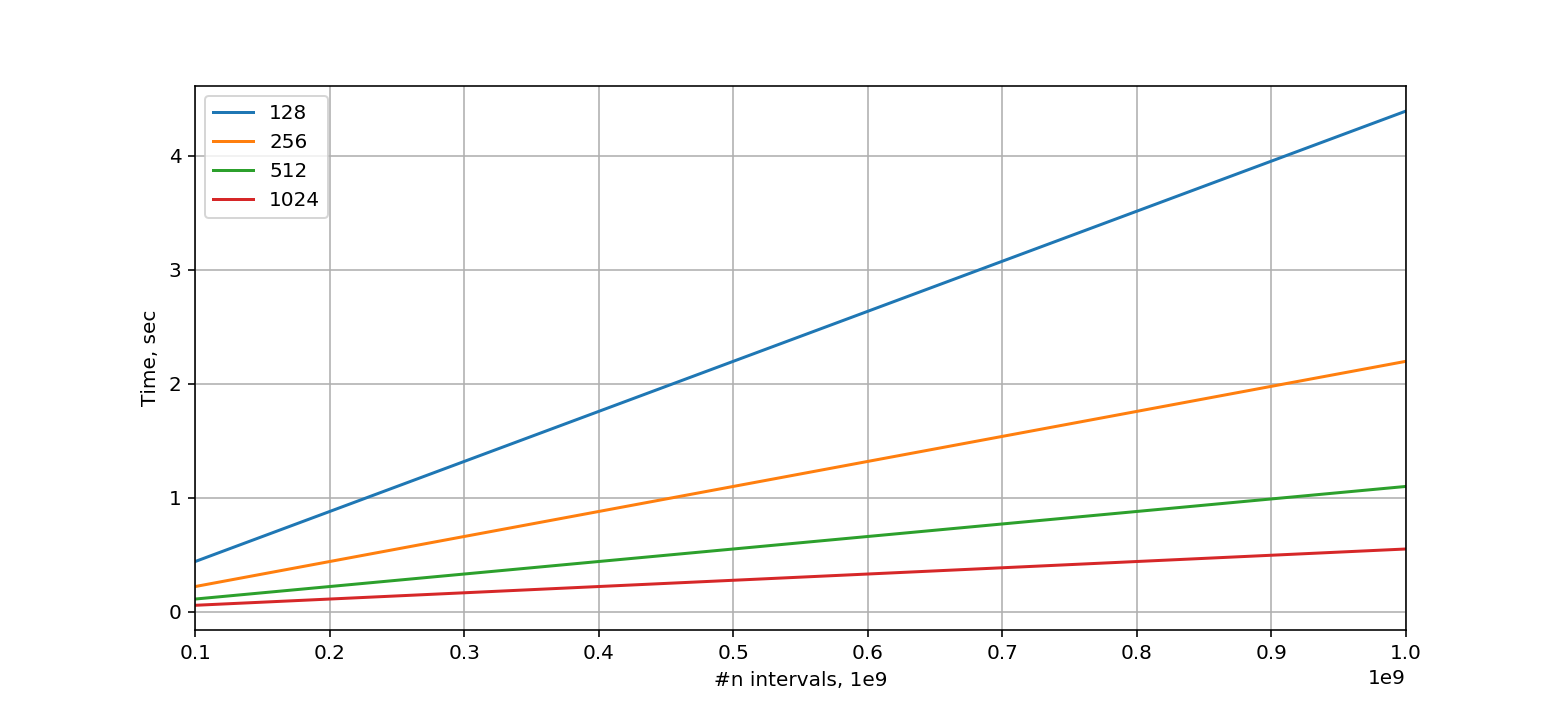

Text(0, 0.5, 'Time, sec')

In [10]:
ax = df.iloc[:, 7:].plot(grid=True)
ax.set_xlabel("#n intervals, 1e9")
ax.set_ylabel("Time, sec")

<IPython.core.display.Javascript object>


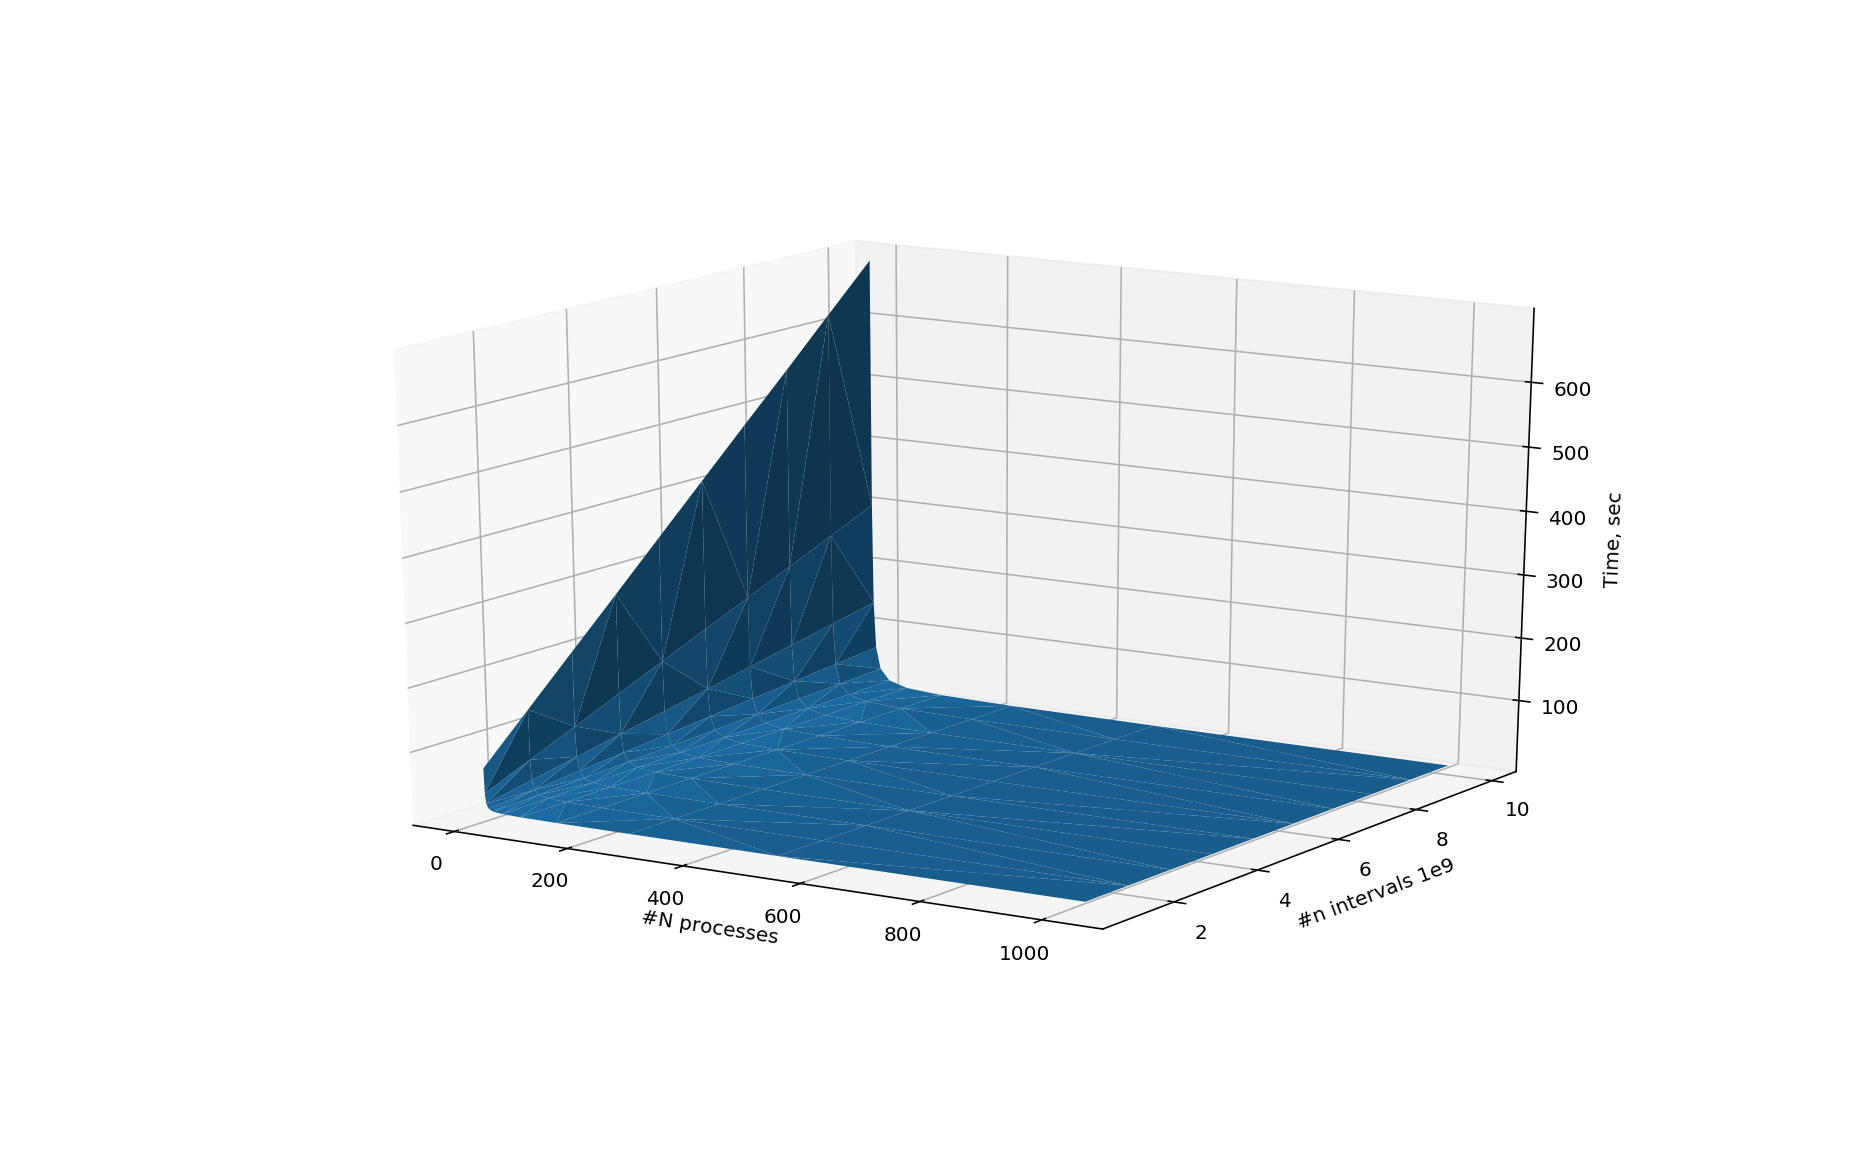

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


NTHREADS = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

x = np.tile(NTHREADS, 10)
y = [1] * 11 + [2] * 11 + [3] * 11 + [4] * 11 + [5] * 11 +[6] * 11 + [7] * 11 + [8] * 11 + [9] * 11 + [10] * 11
z = list(df.values.flatten())

ax.plot_trisurf(x, y, z)

ax.set_xlabel('#N processes')
ax.set_ylabel('#n intervals 1e9')
ax.set_zlabel('Time, sec')

plt.show()

<IPython.core.display.Javascript object>


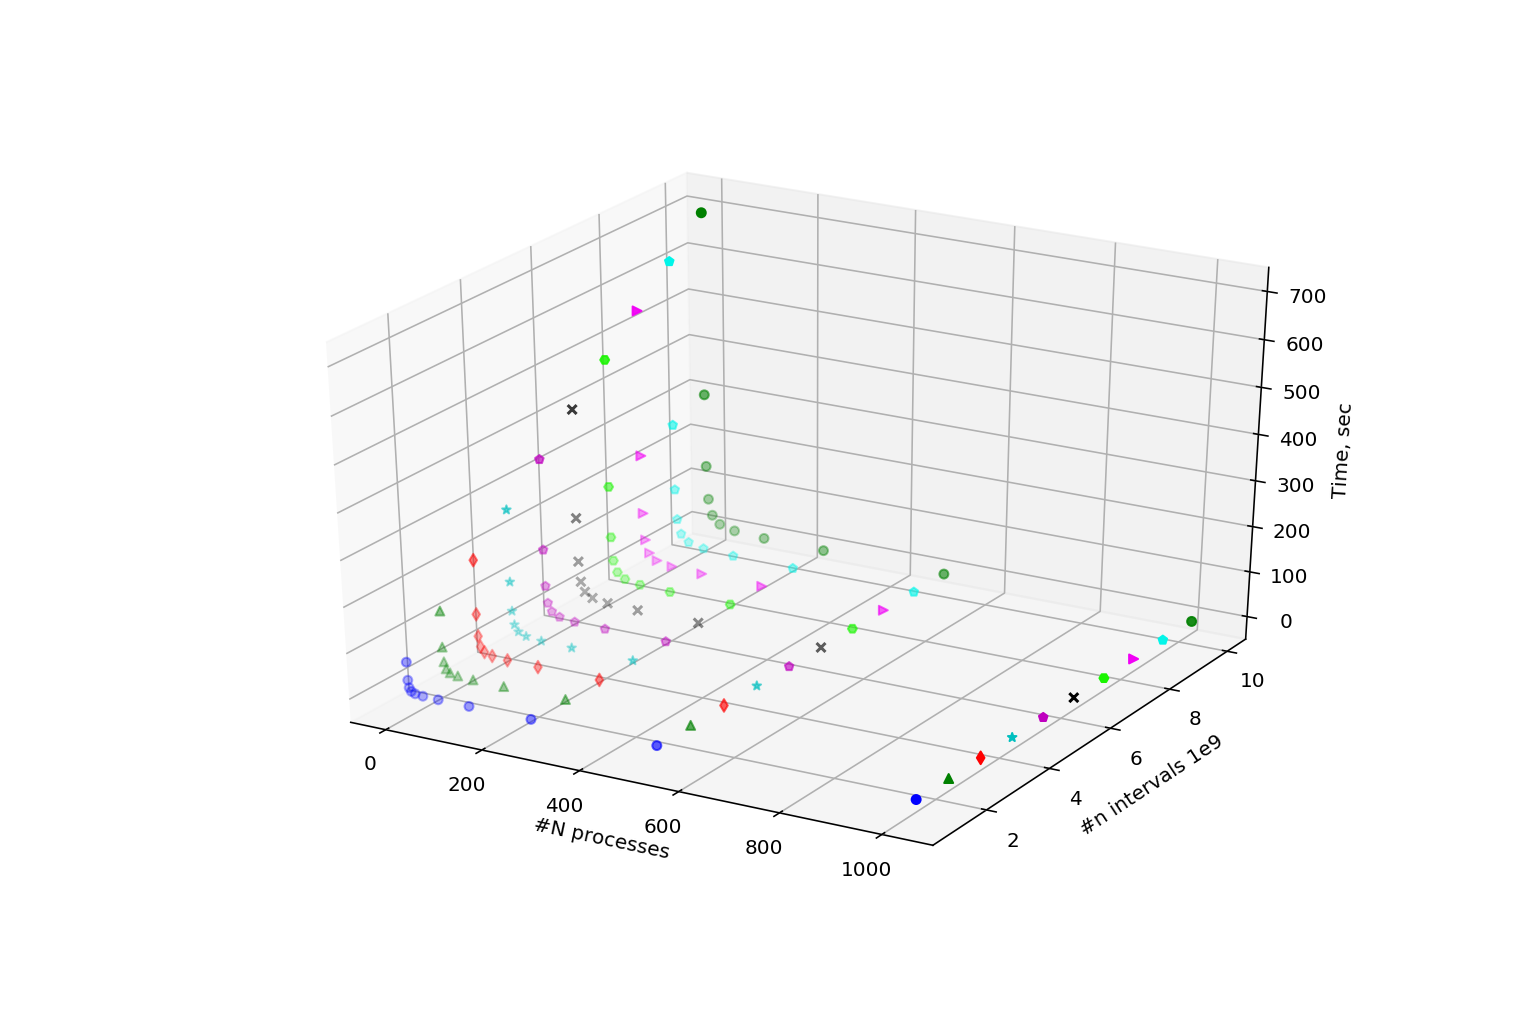

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



colors = ['b', 'g', 'r', 'c', 'm', 'k', '#19f500', '#f100f5', '#00f5e9', 'g', '#383f40', '#a33c9c']
marker = ['o', '^', 'd', '*', 'p', 'x', 'H', '>', 'p', 'o', 'X', 's']
for i in range(0, 10 * 11, 11):
    ax.scatter(x[i:i + 11], y[i:i + 11], z[i:i + 11], c=colors[i // 11], marker=marker[i // 11])

ax.set_xlabel('#N processes')
ax.set_ylabel('#n intervals 1e9')
ax.set_zlabel('Time, sec')

plt.show()